# Exploratory Analysis

#### Load libraries and custom functions from R file

In [2]:
# Data transformation
library(dplyr)
library(readr)
library(lubridate)
# Data visualization
library(ggplot2)
library(scales)
# Custom R file
source("../Common/func.R")

#### Read and transform raw files

In [3]:
# Read csv file that contains water consumption data related to the dish washer.
DWW_raw <- read_csv("../../data/Water_DWW.csv", show_col_types = FALSE)
WHW_raw <- read_csv("../../data/Water_WHW.csv", show_col_types = FALSE)
# Convert unix timestamp column to multiple columns to make future analysis easier
DWW <- convert_timeStamp(DWW_raw, "unix_ts")
WHW <- convert_timeStamp(WHW_raw, "unix_ts")

In [5]:
head(DWW)

counter,avg_rate,timeStamp,date,year,month,day,hour,minute
<dbl>,<dbl>,<dttm>,<date>,<int>,<int>,<int>,<int>,<int>
0,0,2012-04-01 15:00:00,2012-04-01,2012,4,1,15,0
0,0,2012-04-01 15:01:00,2012-04-01,2012,4,1,15,1
0,0,2012-04-01 15:02:00,2012-04-01,2012,4,1,15,2
0,0,2012-04-01 15:03:00,2012-04-01,2012,4,1,15,3
0,0,2012-04-01 15:04:00,2012-04-01,2012,4,1,15,4
0,0,2012-04-01 15:05:00,2012-04-01,2012,4,1,15,5


In [4]:
head(WHW)

counter,avg_rate,inst_rate,timeStamp,date,year,month,day,hour,minute
<dbl>,<dbl>,<dbl>,<dttm>,<date>,<int>,<int>,<int>,<int>,<int>
45287.53,0.000,0,2012-04-01 15:00:00,2012-04-01,2012,4,1,15,0
45291.31,3.785,0,2012-04-01 15:01:00,2012-04-01,2012,4,1,15,1
45291.31,0.000,0,2012-04-01 15:02:00,2012-04-01,2012,4,1,15,2
45291.31,0.000,0,2012-04-01 15:03:00,2012-04-01,2012,4,1,15,3
45295.10,3.785,0,2012-04-01 15:04:00,2012-04-01,2012,4,1,15,4
45295.10,0.000,0,2012-04-01 15:05:00,2012-04-01,2012,4,1,15,5


#### Aggregate metrics: per minute consumption to daily consumption

In [23]:
# Daily Aggregations
# Dish washer
DWW_Daily <- DWW %>%
    group_by(date) %>% 
    summarise(
        year        = factor(first(year)),
        month       = factor(first(month)),
        day         = factor(first(day)),
        day_of_week = first(wday(date, week_start = 1)),
        consumption = sum(avg_rate) / 1000 # Liters to kilo Liters
    )
# Whole hose
WHW_Daily <- WHW %>%
    group_by(date) %>% 
    summarise(
        year        = factor(first(year)),
        month       = factor(first(month)),
        day         = factor(first(day)),
        day_of_week = first(wday(date, week_start = 1)),
        consumption = sum(avg_rate) / 1000 # Liters to kilo Liters
    )

# Monthly aggregations
# Dish washer
DWW_Monthly <- DWW %>%
    group_by(year, month) %>% 
    summarise(
        consumption = sum(avg_rate) / 1000 # Liters to kilo Liters
    )
# Whole house
WHW_Monthly <- WHW %>%
    group_by(year, month) %>% 
    summarise(
        consumption = sum(avg_rate) / 1000 # Liters to kilo Liters
    )

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


#### Visualizations

In [17]:
options(repr.plot.width = 25, repr.plot.height = 8)

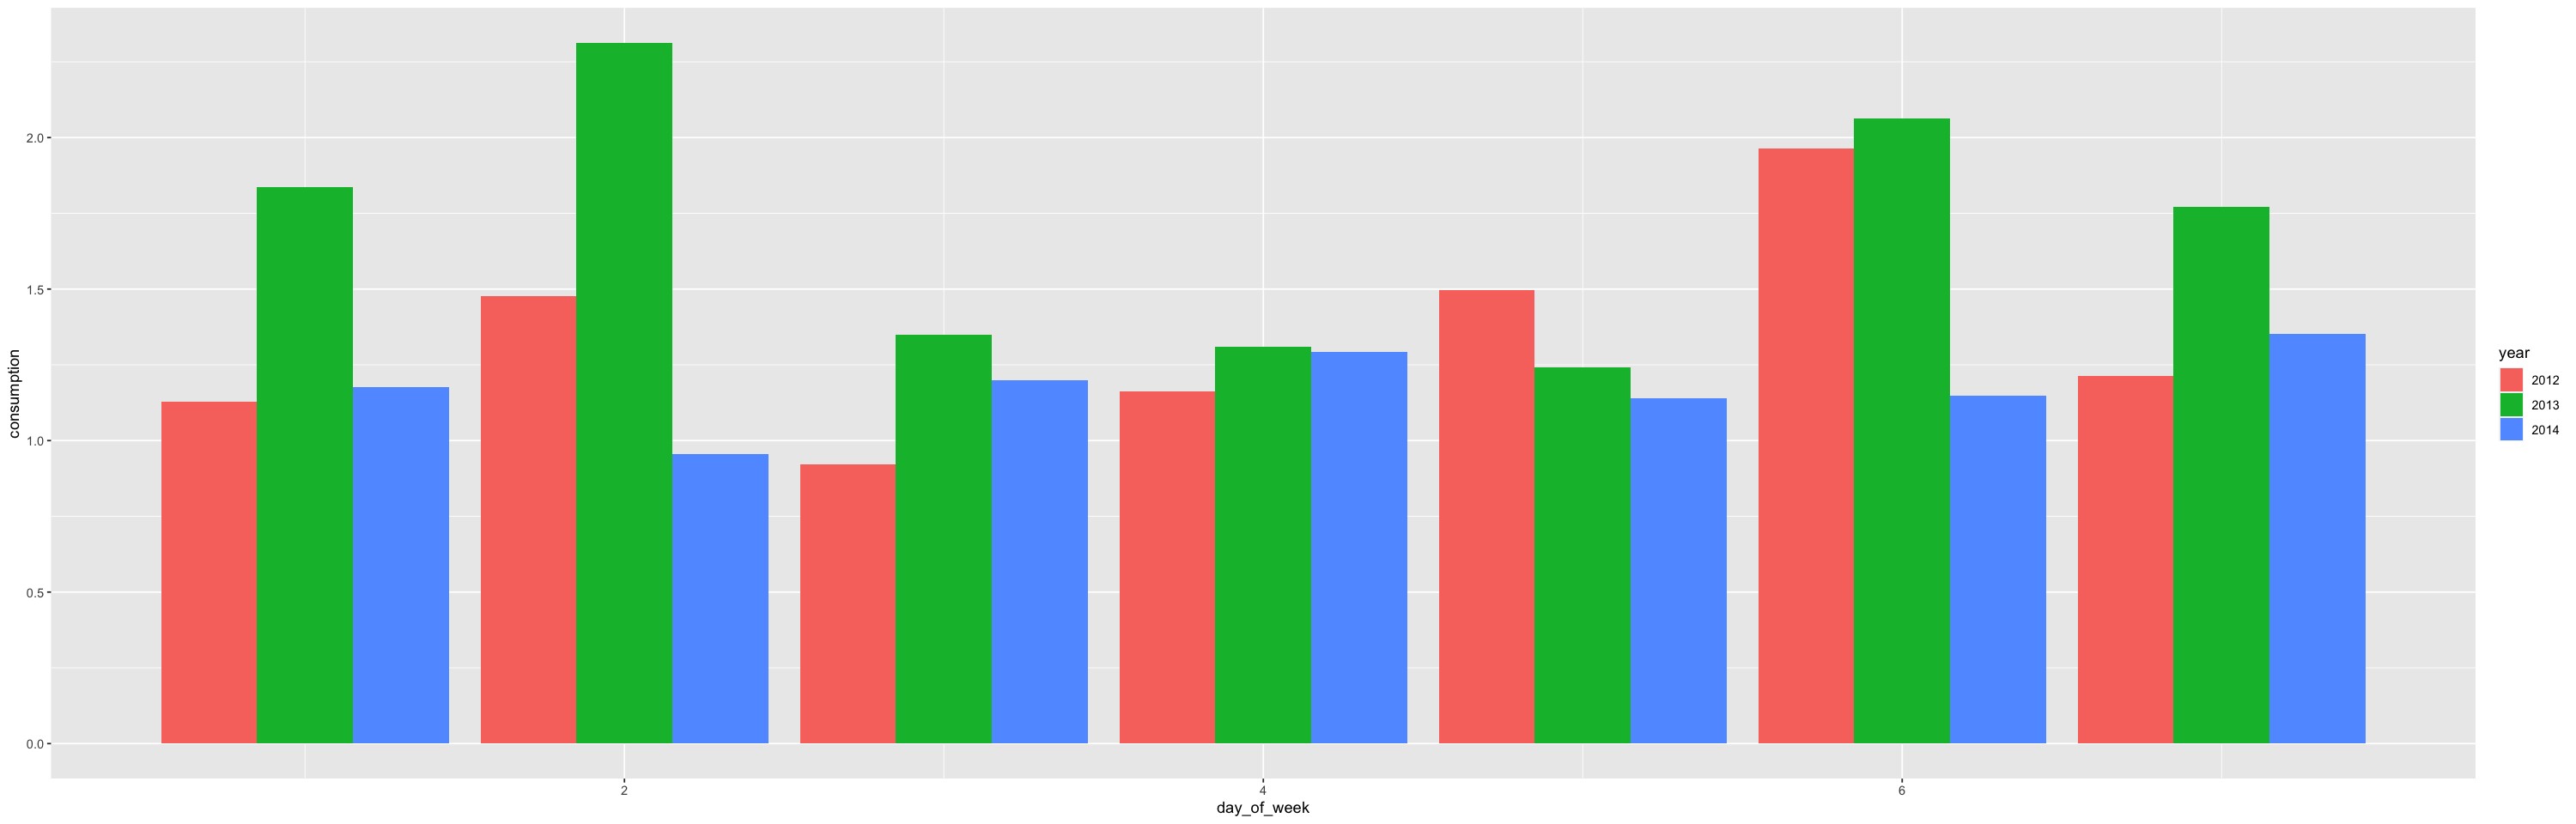

In [25]:
ggplot(WHW_Daily, aes(x = day_of_week, y = consumption, fill = year)) +
    geom_col(position = "dodge")

In [42]:
DWW_Daily_2012_3Months <- DWW_Daily %>% 
    filter(year == 2012, month %in% c(4, 5, 6))

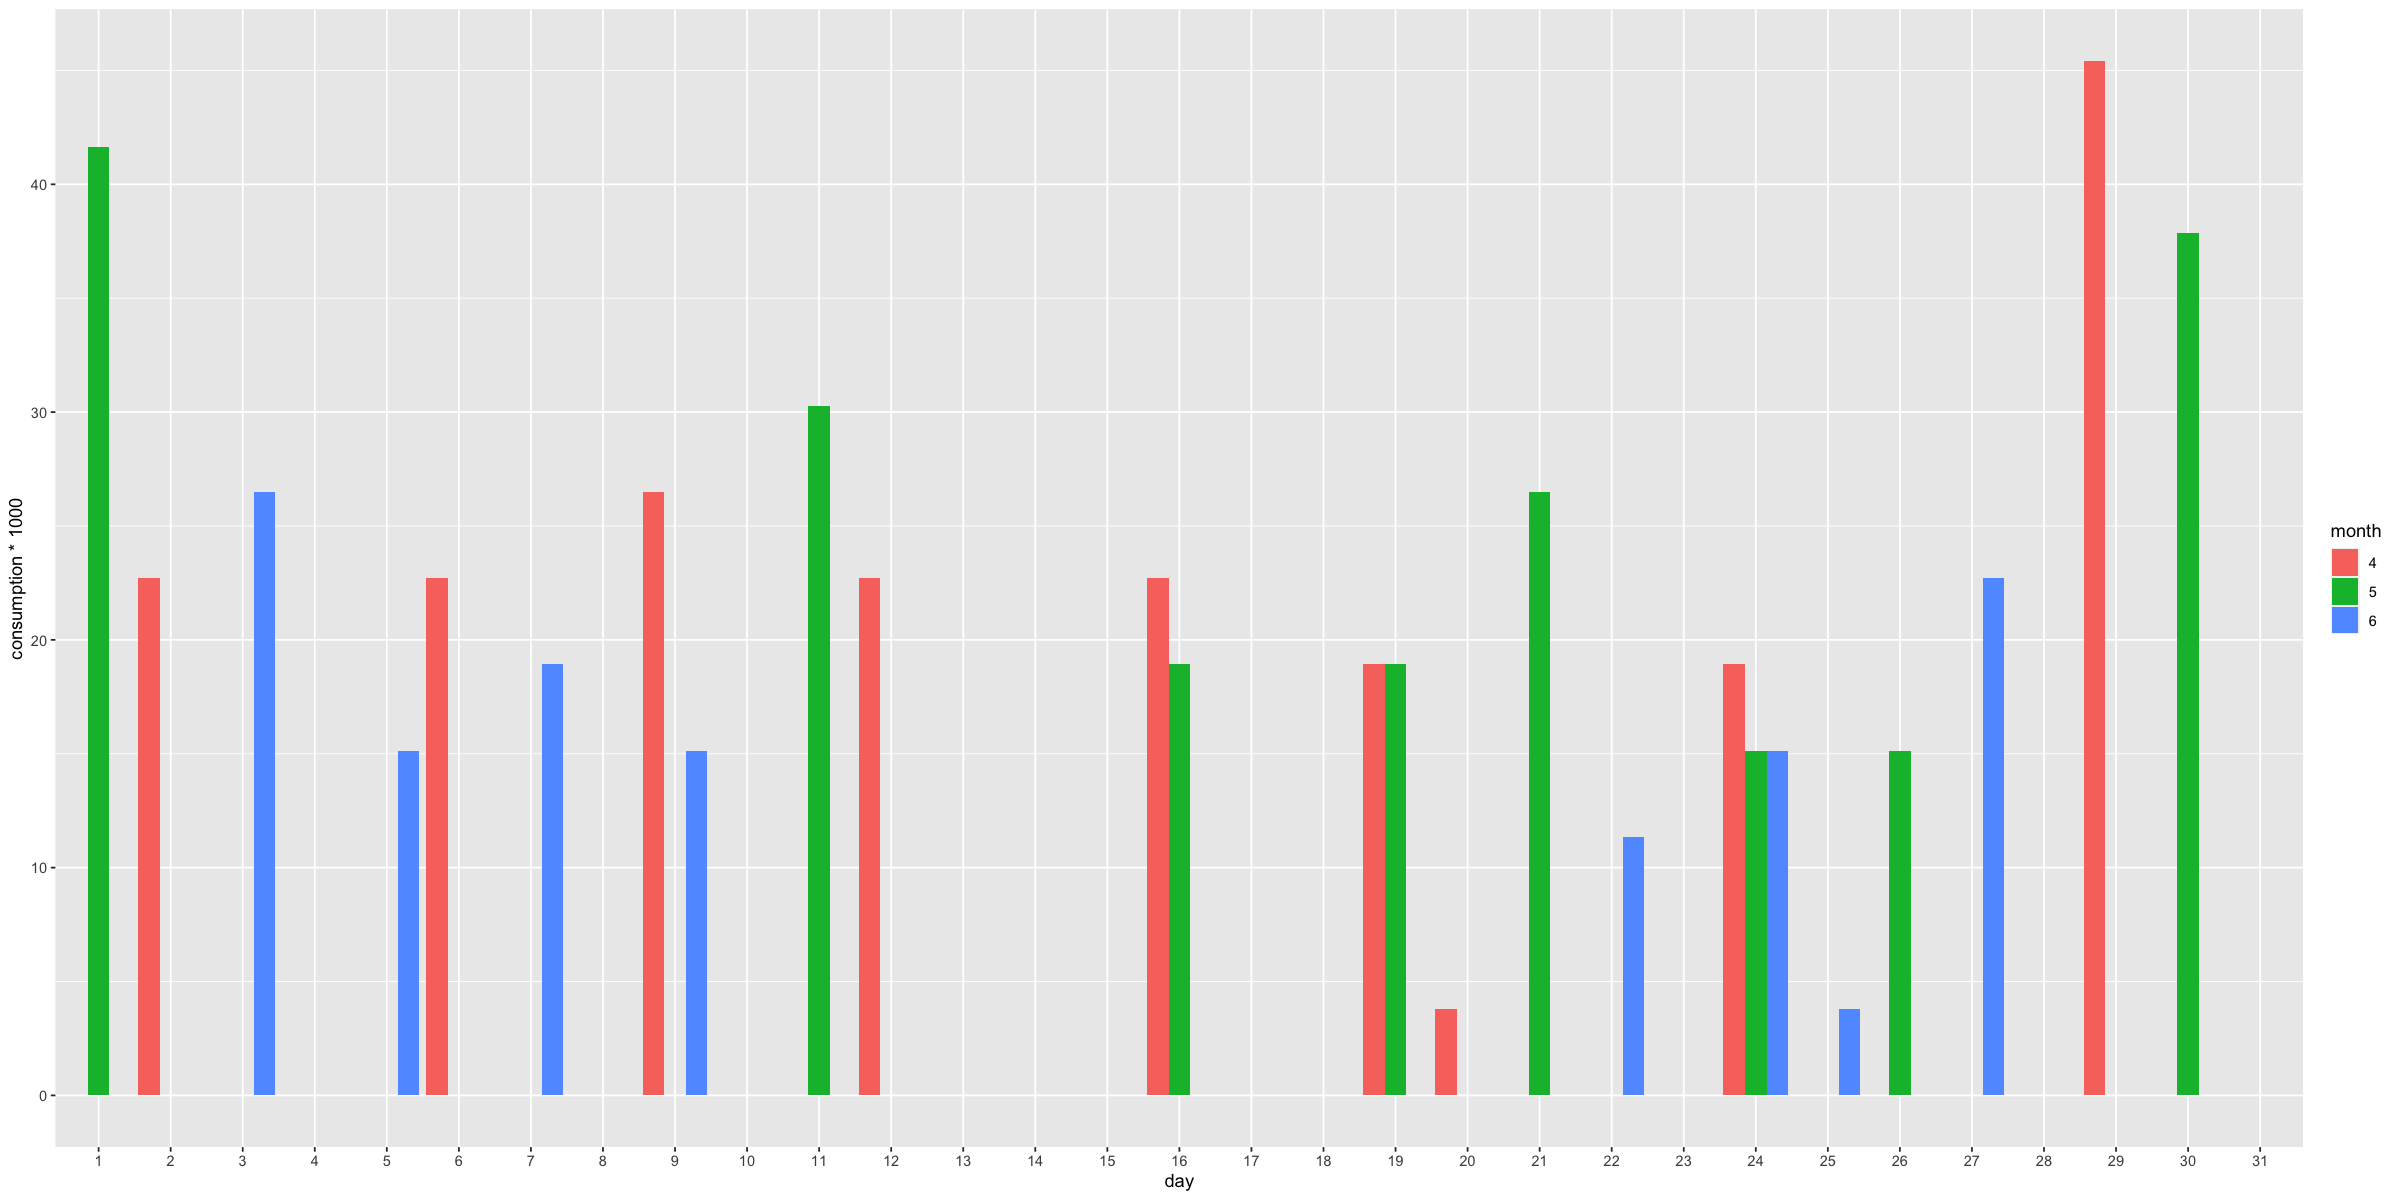

In [49]:
ggplot(DWW_Daily_2012_3Months, aes(x = day, y = consumption * 1000, fill = month, group = month)) +
    geom_col(position = "dodge")

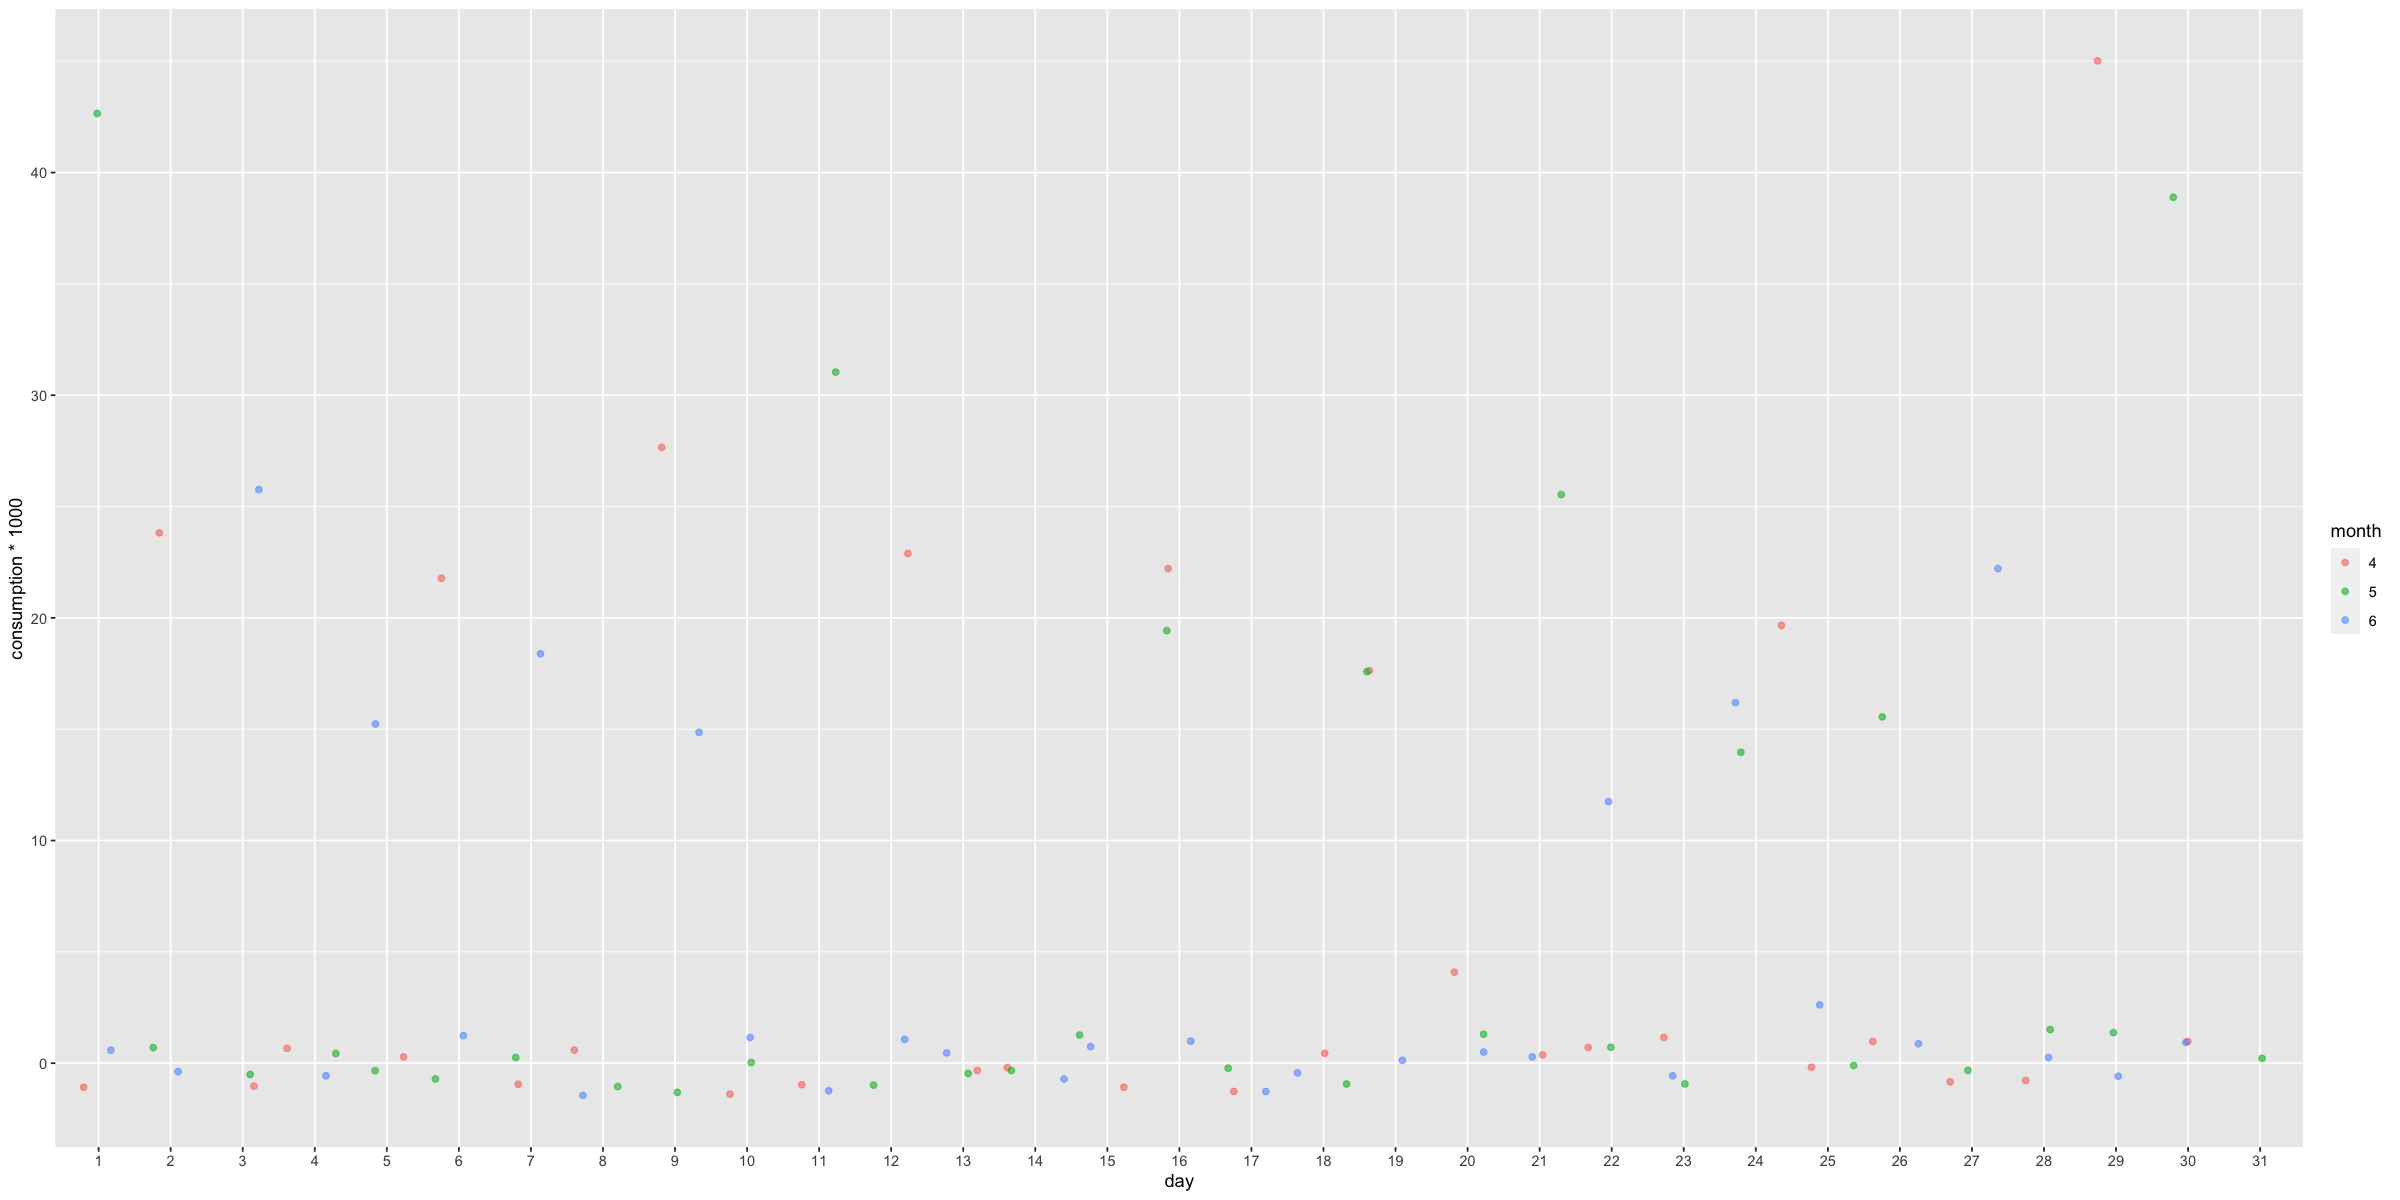

In [54]:
ggplot(DWW_Daily_2012_3Months, aes(x = day, y = consumption * 1000, color = month)) +
    geom_point(alpha = 0.6, position = "jitter")

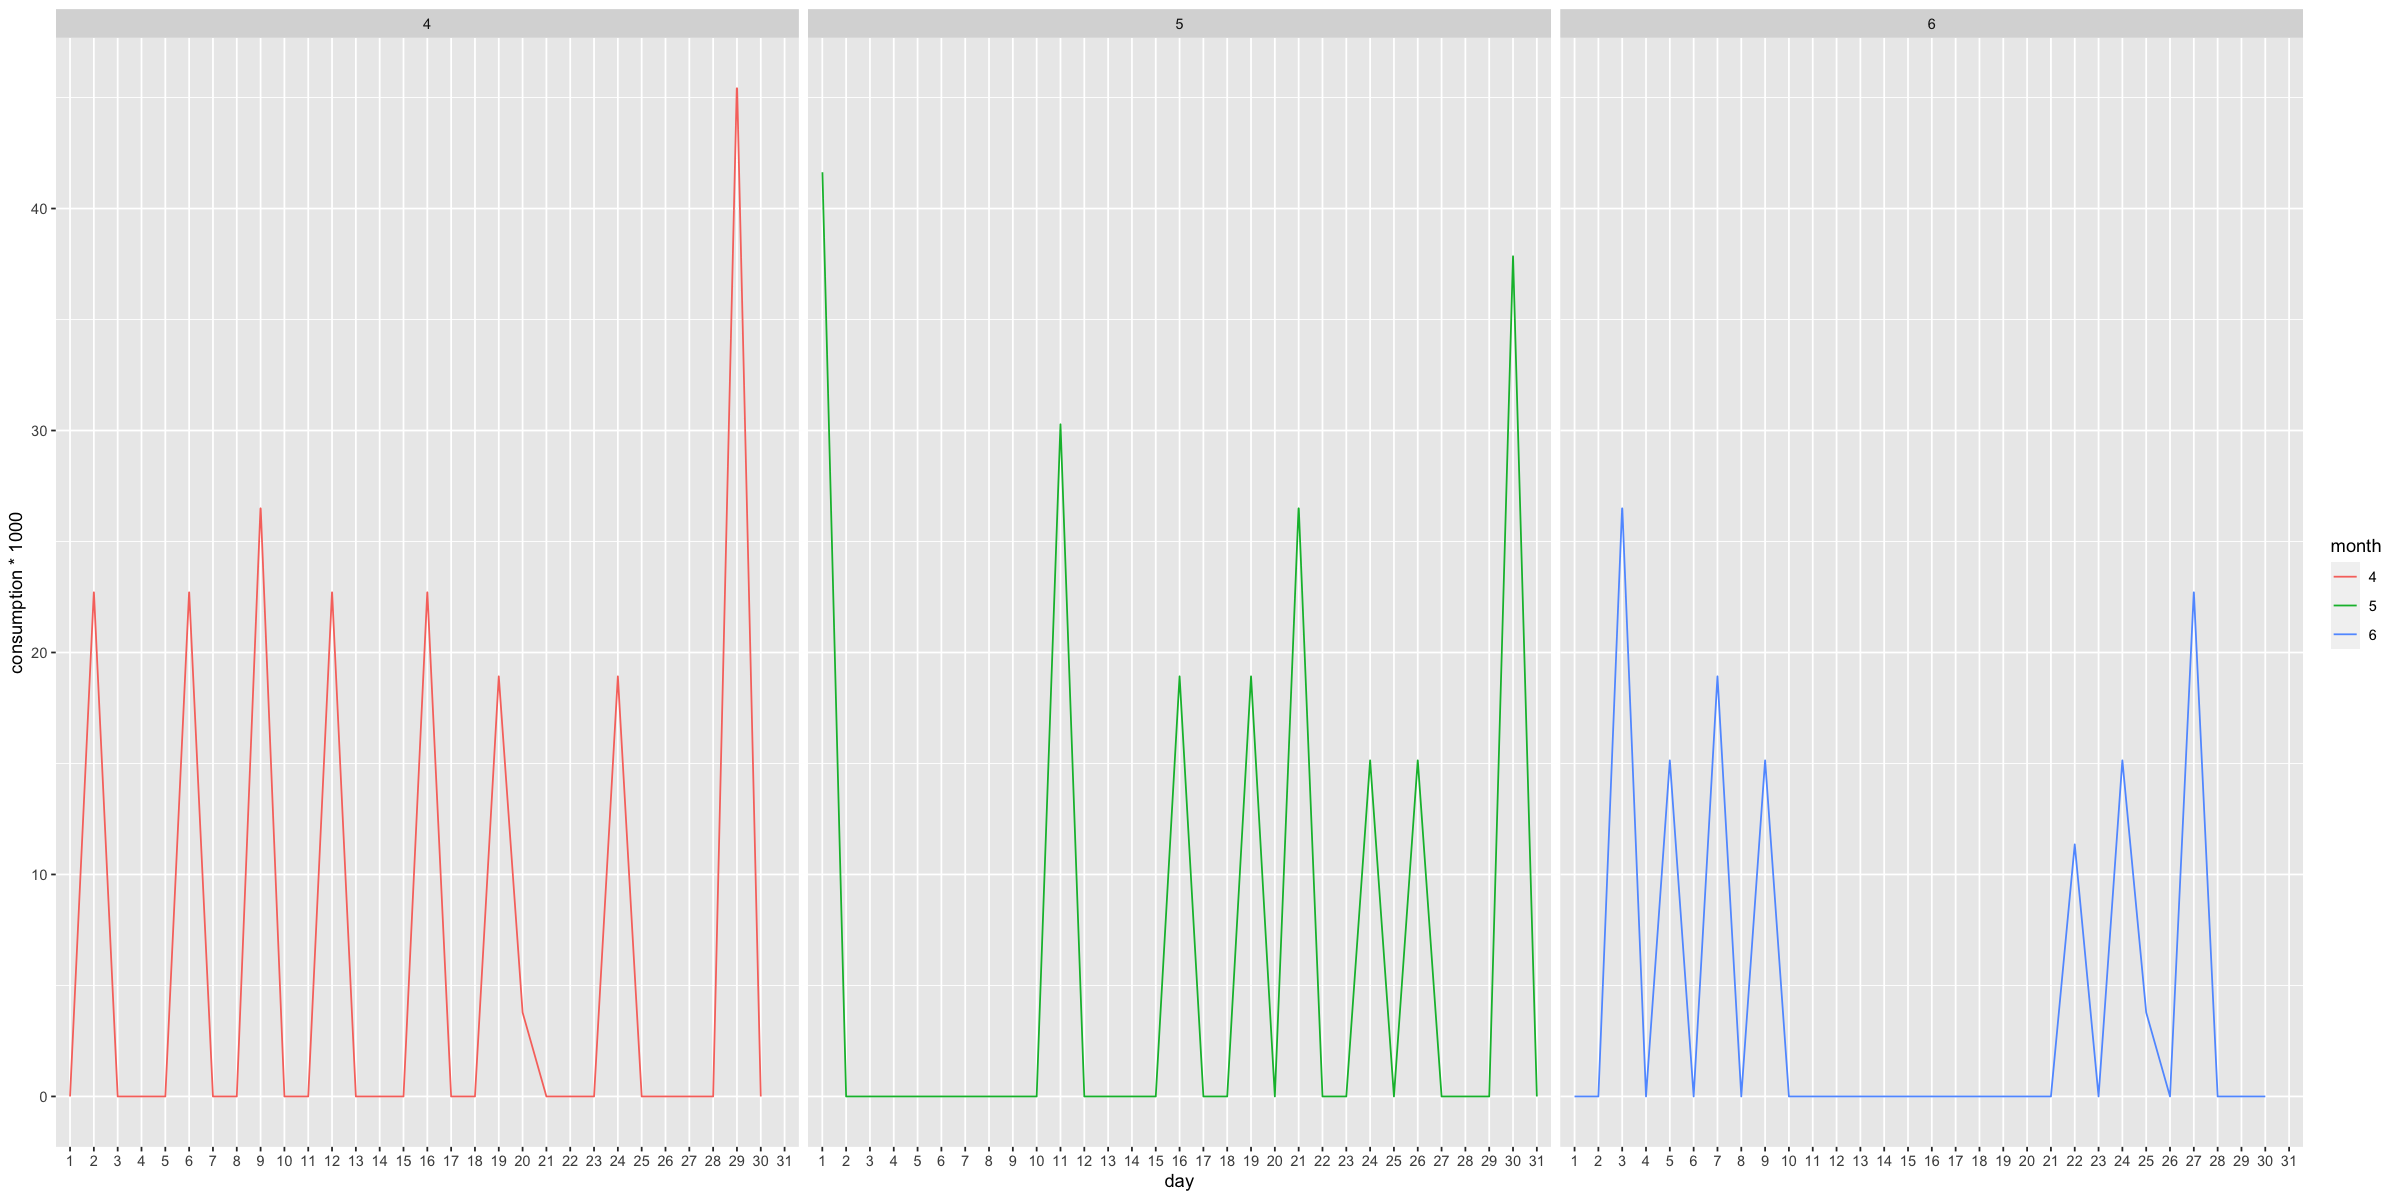

In [86]:
ggplot(DWW_Daily_2012_3Months, aes(x = day, y = consumption * 1000, color = month, group = month)) +
    geom_line() +
    facet_wrap( ~ month)

In [75]:
DWW_Daily_V2 <- DWW %>%
    group_by(date) %>% 
    summarise(
        year        = first(year),
        month       = first(month),
        day         = first(day),
        day_of_week = first(wday(date, week_start = 1)),
        consumption = sum(avg_rate) / 1000 # Liters to kilo Liters
    )

In [94]:
DWW_WeekDay <- DWW %>% 
    mutate(wDay= wday(date, week_start = 1)) %>%
    group_by(year, month, wDay) %>% 
    summarise(
        consumption = sum(avg_rate) / 1000 # Liters to kilo Liters
    )

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


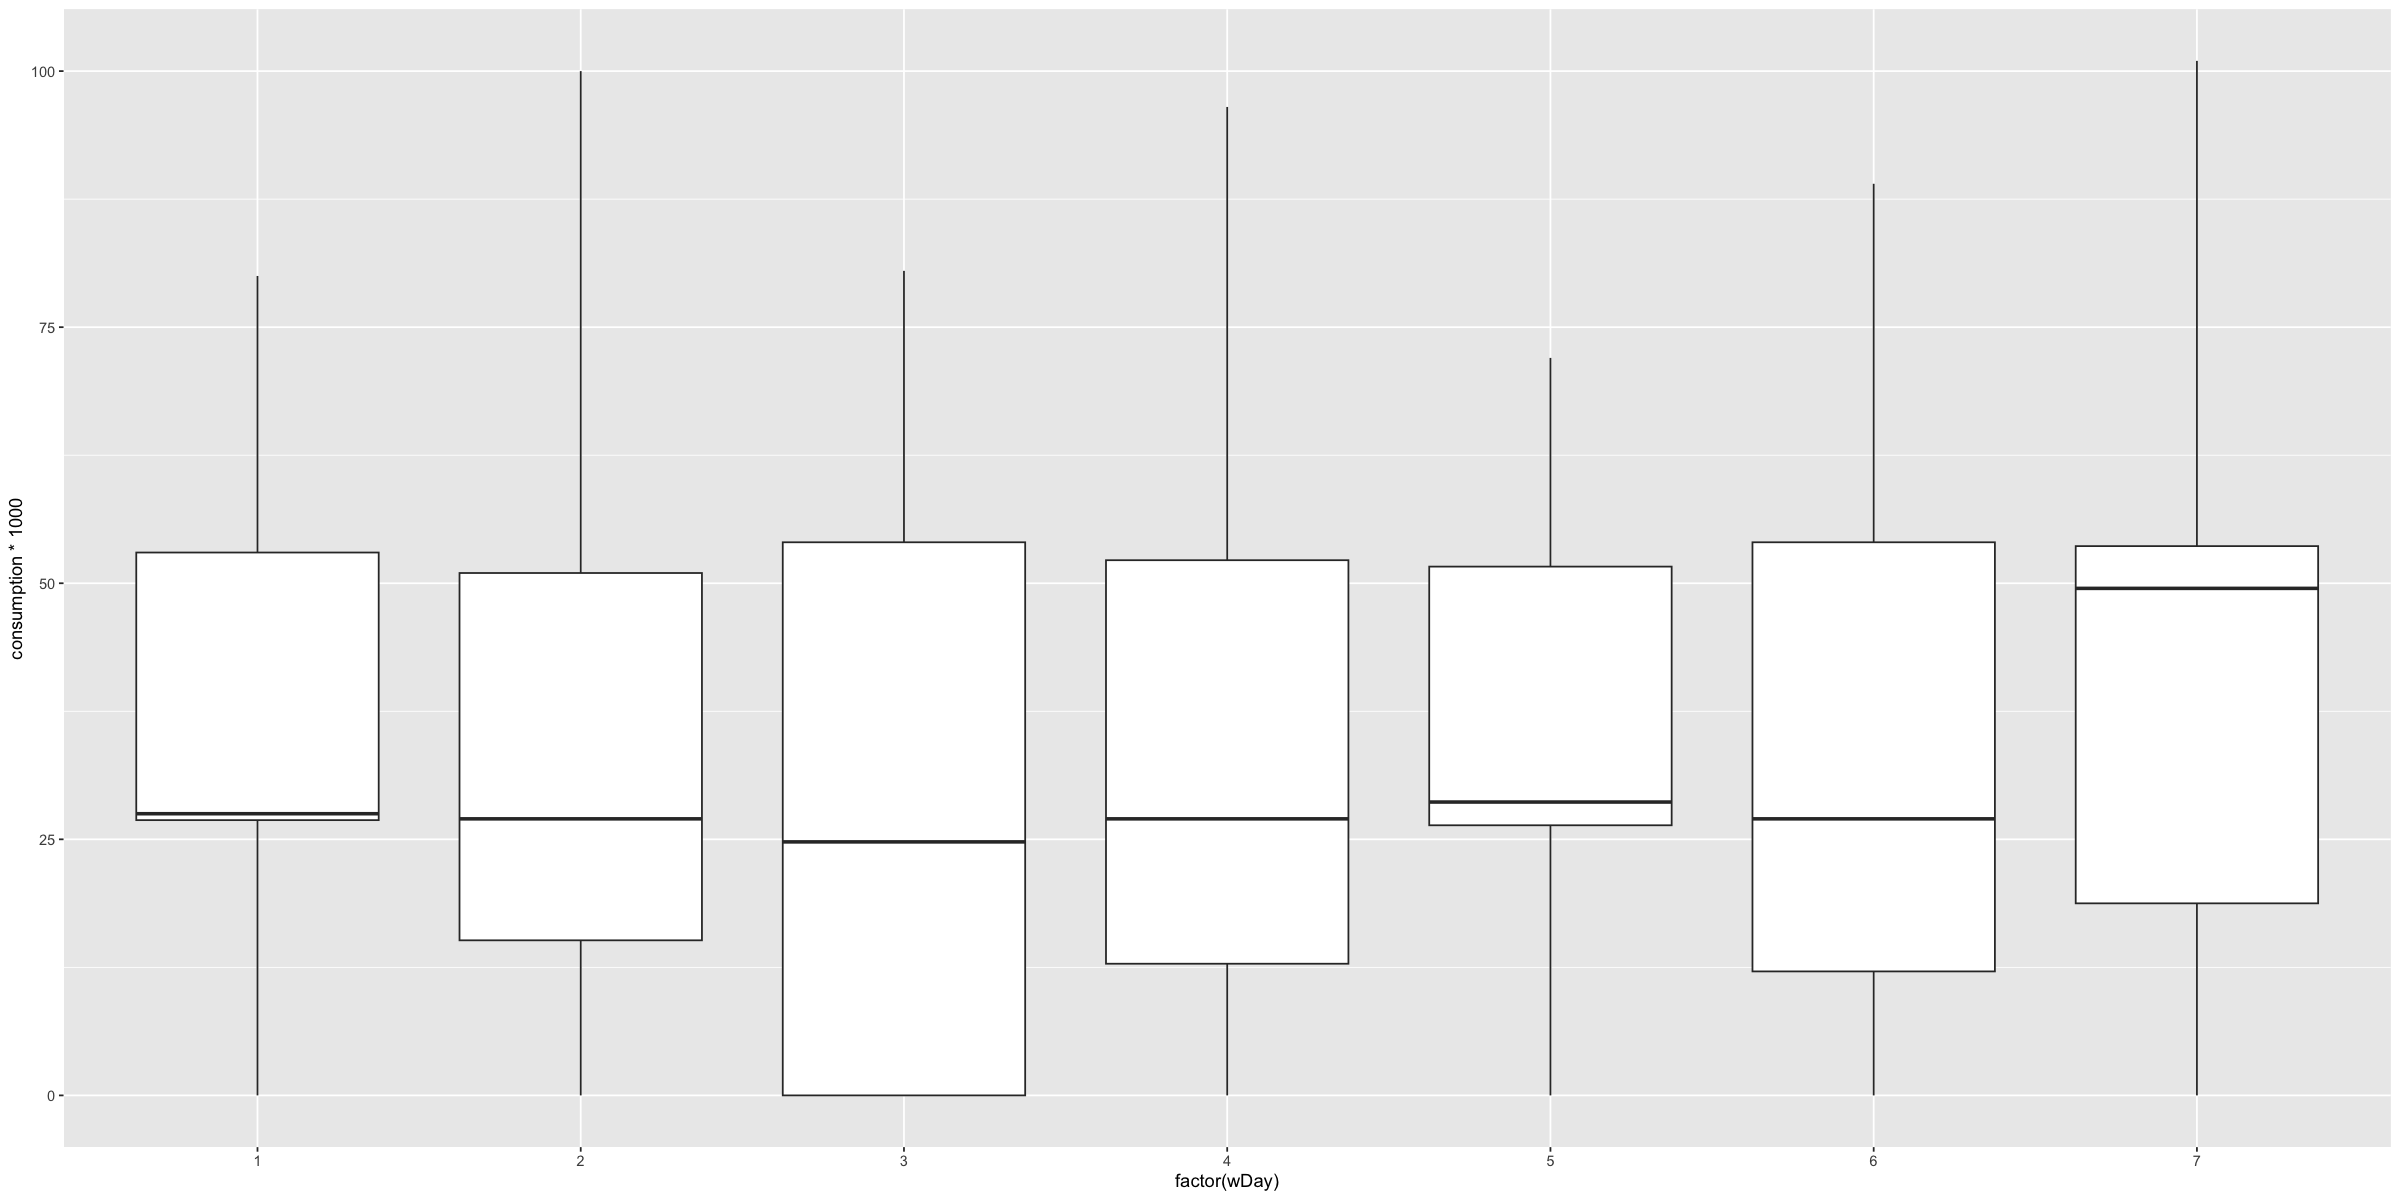

In [109]:
ggplot(DWW_WeekDay, aes(x = factor(wDay), y = consumption * 1000)) +
    geom_boxplot()

In [85]:
year_cons_cor   <- cor(x = DWW_Daily_V2$year,           y = DWW_Daily_V2$consumption, use = "everything", method = c("pearson"))
month_cons_cor  <- cor(x = DWW_Daily_V2$month,          y = DWW_Daily_V2$consumption, use = "everything", method = c("pearson"))
day_cons_cor    <- cor(x = DWW_Daily_V2$day,            y = DWW_Daily_V2$consumption, use = "everything", method = c("pearson"))
wDay_cons_cor   <- cor(x = DWW_Daily_V2$day_of_week,    y = DWW_Daily_V2$consumption, use = "everything", method = c("pearson"))


print(year_cons_cor)
print(month_cons_cor)
print(day_cons_cor)
print(wDay_cons_cor)

[1] 0.07118312
[1] -0.04988899
[1] -0.0001030795
[1] 0.02447953
